In [1]:
from load_model import *
from score_model_overlap_merged import *




Instructions for updating:
non-resource variables are not supported in the long term


Using TensorFlow backend.
/mnt/lab_data3/anusri/kerasAC/kerasAC/vis/plot_letters.py:172: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  min_coords = np.vstack(data.min(0) for data in polygons_data).min(0)
/mnt/lab_data3/anusri/kerasAC/kerasAC/vis/plot_letters.py:173: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  max_coords = np.vstack(data.max(0) for data in polygons_data).max(0)


In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="3"
json_string_f="/srv/scratch/anusri/chrombpnet_paper/GM12878/ATAC_07.22.2021/final_model_step3_new/model.0.arch"
weights_f="/srv/scratch/anusri/chrombpnet_paper/GM12878/ATAC_07.22.2021/final_model_step3_new/model.0.weights"
model=load_model_wrapper(json_string=json_string_f, weights=weights_f)




In [3]:
from keras.models import Model
model_new = Model(inputs=model.inputs,outputs=[model.layers[-5].output, model.outputs[1]])





In [44]:
ref_fasta="/mnt/data/GRCh38_no_alt_analysis_set_GCA_000001405.15.fasta"
ref=pysam.FastaFile(ref_fasta)
seq=[ref.fetch("chr20",3767907-1057,3767907+1057)] 
onehot=one_hot_encode(seq)

def get_preds(model,seq_onehot):
    preds=model.predict(seq_onehot)
    prof=preds[0] #logits
    probs=np.squeeze(softmax(prof,axis=1)) #probabilities 
    count=np.squeeze(preds[1])   #count (1 val) 
    count_track=probs*np.expand_dims([np.exp(count)],axis=1)  #count track 
    return prof,count,probs,count_track


prof,count,probs,count_track= get_preds(model_new,onehot)



pbw=pyBigWig.open("/srv/scratch/anusri/chrombpnet_paper/GM12878/data/shifted_4_4.sorted.bam.bpnet.unstranded.bw",'r')
gt_val=np.nan_to_num(pbw.values("chr20",3767907-500,3767907+500))

tobias_coorected=pyBigWig.open("/srv/scratch/anusri/chrombpnet_paper/tobias_scripts/GM12878/actual_tobias_files/GM12878.atac.filt.merged_corrected.bw",'r')
tobias_val=np.nan_to_num(tobias_coorected.values("chr20",3767907-500,3767907+500))

In [45]:
import matplotlib.pyplot as plt


[<matplotlib.lines.Line2D at 0x7f83e81f9d10>]

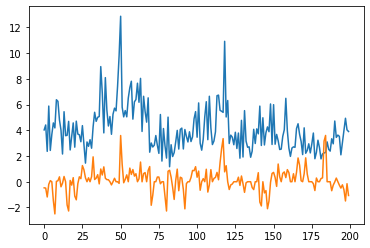

In [64]:
#plt.plot(gt_val/sum(gt_val), label="observed")
#plt.plot(probs)
#plt.plot(gt_val[400:600], label="observed", alpha=0.5)
plt.plot(count_track[0,400:600])
plt.plot(tobias_val[400:600], label="tobias corrected")
#plt.plot(gt_val, label="observed", alpha=0.5)
#plt.plot(count_track[0])
#plt.plot(tobias_val, label="tobias corrected")




